In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [10]:
#loading dataset
new_df= pd.read_csv("../data/clean/merged_df_clean.csv")
new_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321191,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321192,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321193,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


In [11]:
new_df.shape

(321195, 14)

In [12]:
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Convert 'process_step' to a categorical type with this order
new_df['process_step'] = pd.Categorical(new_df['process_step'], categories=step_order, ordered=True)

# Now sort by process_step
df_sorted = new_df.sort_values(by='process_step')

# If you also want to sort by visit or client to preserve logical session order:
df_sorted = df_sorted.sort_values(by=['visit_id', 'process_step'])
df_sorted

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106827,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0
106826,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0
236484,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236485,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
236490,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95620,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:51:09,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
95624,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
95623,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0
95621,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0


In [13]:
#counting the two groups
unique_visitors = new_df[['visitor_id', 'Variation']].drop_duplicates()

#count unique visitor_id per group
visitor_per_group = unique_visitors.groupby('Variation')['visitor_id'].nunique().reset_index(name='unique_visitors')
visitor_per_group

,Variation,unique_visitors
0,Control,26271
1,Test,29908


In [14]:
#Completion Rate: The proportion of users who reach the final "confirm" step in one go (clean linear flow)
#Percentage of users (visitor_id) that completed the process in one go, assuming "confirm" as complete process

#sort by visitor and datetime
df_sorted = new_df.sort_values(by=['visitor_id', 'date_time'])

#define the expected perfect flow
expected_flow = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

#groupby process steps by visitor id and variation
visitor_flows = df_sorted.groupby(['visitor_id', 'Variation'])['process_step'].apply(list).reset_index()

#checking if followed the exact linear flow with no deviations
visitor_flows['completed_clean_linear'] = visitor_flows['process_step'].apply(lambda steps: steps == expected_flow)

#aggregate results by variation
clean_completion_df = (visitor_flows.groupby('Variation')['completed_clean_linear'].agg(users_completed='sum', total_users='count').reset_index())
clean_completion_df['clean_completion_rate'] = (clean_completion_df['users_completed'] / clean_completion_df['total_users'] * 100).round(2)
clean_completion_df

,Variation,users_completed,total_users,clean_completion_rate
0,Control,7683,26271,29.25
1,Test,8944,29908,29.91


In [15]:
clean_completion_df.rename(columns={'Variation': 'Group'}, inplace=True)
clean_completion_df

,Group,users_completed,total_users,clean_completion_rate
0,Control,7683,26271,29.25
1,Test,8944,29908,29.91


In [16]:
clean_completion_df.to_csv('clean_flow.csv', index=False)

In [17]:
#Completion Rate: The proportion of users who reach the final "confirm" step in one go (flexible completion)
#ensure datetime is correct
new_df['date_time'] = pd.to_datetime(new_df['date_time'])

#expected flow 
expected_sequence = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

#function to check if expected_sequence is a subsequence of steps
def is_subsequence(steps, expected):
    it = iter(steps)
    return all(step in it for step in expected)

#get process steps per visitor + variation, sorted by time
df_sorted = new_df.sort_values(by=['visitor_id', 'date_time'])
visitor_flows = (df_sorted.groupby(['visitor_id', 'Variation'])['process_step'].apply(list).reset_index())

#check whether flow is a subsequence 
visitor_flows['completed_partial_flow'] = visitor_flows['process_step'].apply(lambda steps: is_subsequence(steps, expected_sequence))

#aggregate results by Variation
flexible_completion_df = (visitor_flows.groupby('Variation')['completed_partial_flow'].agg(users_completed='sum', total_users='count').reset_index())

flexible_completion_df['partial_completion_rate'] = (flexible_completion_df['users_completed'] / flexible_completion_df['total_users'] * 100).round(2)
flexible_completion_df

,Variation,users_completed,total_users,partial_completion_rate
0,Control,15081,26271,57.41
1,Test,18230,29908,60.95


In [17]:
flexible_completion_df.rename(columns={'Variation': 'Group'}, inplace=True)
flexible_completion_df

,Group,users_completed,total_users,partial_completion_rate
0,Control,15081,26271,57.41
1,Test,18230,29908,60.95


In [16]:
flexible_completion_df.to_csv('flexible_flow.csv', index=False)

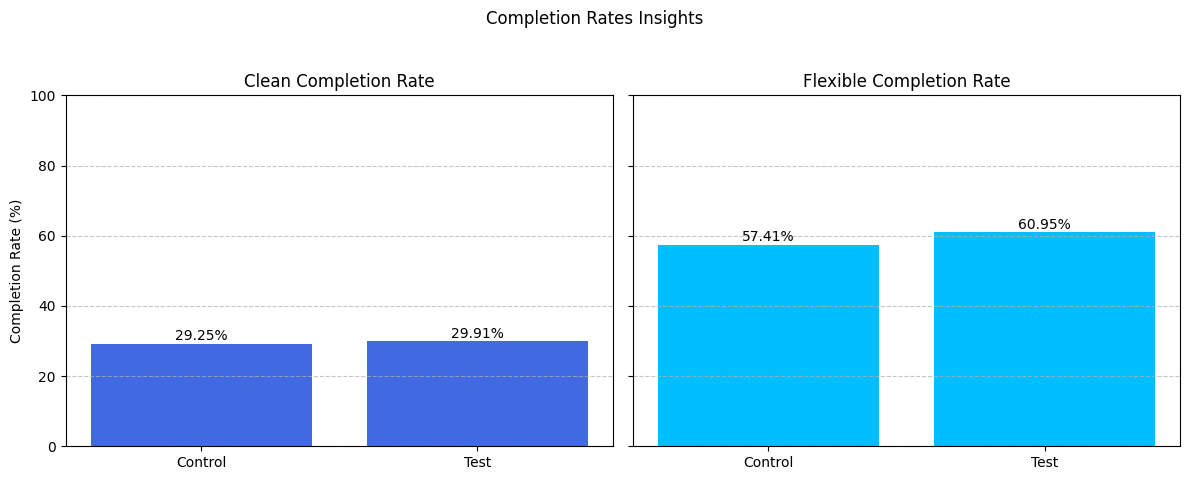

In [18]:
clean_data = pd.DataFrame({'Variation': ['Control', 'Test'],'Completion Rate (%)': [29.25, 29.91]})

partial_data = pd.DataFrame({'Variation': ['Control', 'Test'],'Completion Rate (%)': [57.41, 60.95]})

#side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#clean completion rate chart
axes[0].bar(clean_data['Variation'], clean_data['Completion Rate (%)'], color='royalblue')
axes[0].set_title('Clean Completion Rate')
axes[0].set_ylabel('Completion Rate (%)')
axes[0].set_ylim(0, 100)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(clean_data['Completion Rate (%)']):
    axes[0].text(i, val + 1, f'{val:.2f}%', ha='center')

#flexible completion rate chart
axes[1].bar(partial_data['Variation'], partial_data['Completion Rate (%)'], color='deepskyblue')
axes[1].set_title('Flexible Completion Rate')
axes[1].set_ylim(0, 100)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(partial_data['Completion Rate (%)']):
    axes[1].text(i, val + 1, f'{val:.2f}%', ha='center')

plt.suptitle('Completion Rates Insights')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
#Completion Rate: The proportion of users who reach the final "confirm" (total flexibility)
# Sort by visitor_id and datetime (optional but good practice)
df_sorted = new_df.sort_values(by=['visitor_id', 'date_time'])

# Get the list of all unique visitors by Variation
all_visitors = df_sorted.groupby('Variation')['visitor_id'].unique().reset_index()
all_visitors = all_visitors.rename(columns={'visitor_id': 'all_visitors'})

# Get visitors who reached 'confirm' step by Variation
confirm_visitors = df_sorted[df_sorted['process_step'] == 'confirm'] \
    .groupby('Variation')['visitor_id'].unique().reset_index()
confirm_visitors = confirm_visitors.rename(columns={'visitor_id': 'confirm_visitors'})

# Merge both to calculate counts and rates
merged = all_visitors.merge(confirm_visitors, on='Variation', how='left')

# Fill NaN in confirm_visitors if no one reached 'confirm' in that group
merged['confirm_visitors'] = merged['confirm_visitors'].apply(lambda x: x if isinstance(x, (list, np.ndarray)) else [])

# Calculate counts
merged['total_users'] = merged['all_visitors'].apply(len)
merged['users_reached_confirm'] = merged['confirm_visitors'].apply(len)

# Calculate percentage
merged['confirm_rate'] = (merged['users_reached_confirm'] / merged['total_users'] * 100).round(2)

# Select relevant columns
total_flex_df = merged[['Variation', 'users_reached_confirm', 'total_users', 'confirm_rate']]

total_flex_df

,Variation,users_reached_confirm,total_users,confirm_rate
0,Control,15560,26271,59.23
1,Test,19499,29908,65.20


In [20]:
#Completion rate by visitor_id, variation (Control and Test) and age
#define correct steps
expected_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

#define bins and labels for age groups
bins = [0, 29, 39, 49, 59, 69, 79, 200]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']

#filter for Control and Test variations only
filtered_df = new_df[new_df['Variation'].isin(['Control', 'Test'])].copy()

#add age group column
filtered_df['age_group'] = pd.cut(filtered_df['clnt_age'], bins=bins, labels=labels)

#sort by visitor and datetime to get steps in order
filtered_df = filtered_df.sort_values(['visitor_id', 'date_time'])

#aggregate process steps per visitor
visitor_steps = filtered_df.groupby(['Variation', 'visitor_id'])['process_step'].apply(list).reset_index()

#function to check if steps match expected sequence exactly
def is_clean_complete(steps):
    return steps == expected_steps

#mark visitors who completed cleanly in one go and keep only the one who completed in one go
visitor_steps['clean_complete'] = visitor_steps['process_step'].apply(is_clean_complete)
clean_visitors = visitor_steps[visitor_steps['clean_complete'] == True]
age_info = filtered_df.groupby('visitor_id')['age_group'].first().reset_index()
clean_visitors = clean_visitors.merge(age_info, on='visitor_id', how='left')

#total unique visitors per Variation and age group
total_visitors = filtered_df.groupby(['Variation', 'age_group'], observed=False)['visitor_id'].nunique().reset_index(name='total_visitors')

#unique visitors who completed cleanly per Variation and age group
clean_complete_visitors = clean_visitors.groupby(['Variation', 'age_group'], observed=False)['visitor_id'].nunique().reset_index(name='clean_complete_visitors')

#merge totals and completions
comp_age_df = pd.merge(total_visitors, clean_complete_visitors, on=['Variation', 'age_group'], how='left')

#calculate rate and fill missing values with 0 for those groups with no completions
comp_age_df['clean_complete_visitors'] = comp_age_df['clean_complete_visitors'].fillna(0)
comp_age_df['completion_rate'] = (comp_age_df['clean_complete_visitors'] / comp_age_df['total_visitors'] * 100).round(2)
comp_age_df

,Variation,age_group,total_visitors,clean_complete_visitors,completion_rate
0,Control,<30,4069,1253,30.79
1,Control,30–39,4867,1645,33.80
2,Control,40–49,4422,1394,31.52
3,Control,50–59,5799,1706,29.42
4,Control,60–69,5118,1271,24.83
5,Control,70–79,1686,356,21.12
6,Control,80+,334,58,17.37
7,Test,<30,4542,1599,35.20
8,Test,30–39,5773,2048,35.48
9,Test,40–49,5013,1627,32.46


In [43]:
#Interleave table
pivot_df = comp_age_df.pivot(index='age_group', columns='Variation', values=['total_visitors', 'clean_complete_visitors', 'completion_rate'])

pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

pivot_df = pivot_df.rename(columns={
    'total_visitors_Control': 'Control_total',
    'completed_visitors_Control': 'Control_completed',
    'completion_rate_Control': 'Control_rate (%)',
    'total_visitors_Test': 'Test_total',
    'completed_visitors_Test': 'Test_completed',
    'completion_rate_Test': 'Test_rate (%)'
}).reset_index()

pivot_df

,age_group,Control_total,Test_total,clean_complete_visitors_Control,clean_complete_visitors_Test,Control_rate (%),Test_rate (%)
0,<30,4069.0,4542.0,1253.0,1599.0,30.79,35.20
1,30–39,4867.0,5773.0,1645.0,2048.0,33.80,35.48
2,40–49,4422.0,5013.0,1394.0,1627.0,31.52,32.46
3,50–59,5799.0,6552.0,1706.0,1756.0,29.42,26.80
4,60–69,5118.0,5799.0,1271.0,1469.0,24.83,25.33
5,70–79,1686.0,1852.0,356.0,372.0,21.12,20.09
6,80+,334.0,408.0,58.0,73.0,17.37,17.89


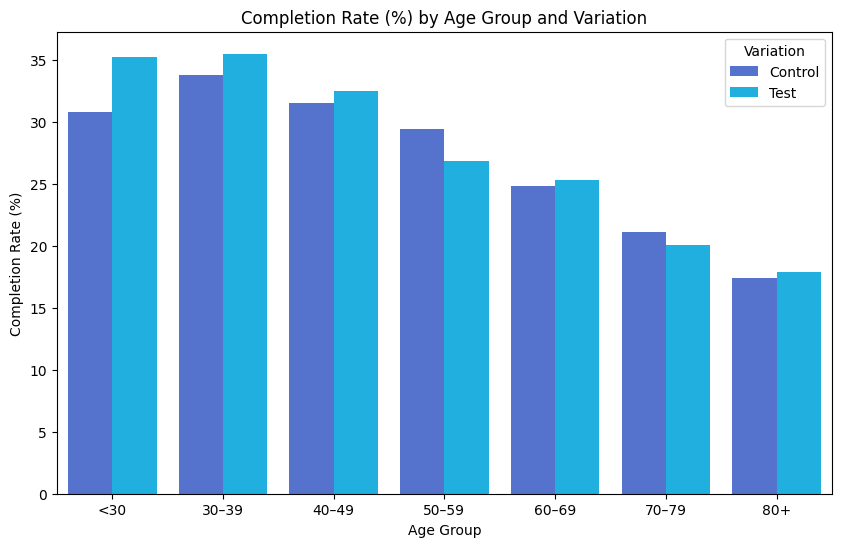

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
plot_data = pivot_df.melt(id_vars='age_group', 
                    value_vars=['Control_rate (%)', 'Test_rate (%)'],
                    var_name='Variation', value_name='Completion Rate')

# Replace variation names to Control/Test only
plot_data['Variation'] = plot_data['Variation'].str.replace('_rate (%)','')

sns.barplot(data=plot_data, x='age_group', y='Completion Rate', hue='Variation', palette=['royalblue','deepskyblue'], ax=ax)

ax.set_title('Completion Rate (%) by Age Group and Variation')
ax.set_xlabel('Age Group')
ax.set_ylabel('Completion Rate (%)')

plt.show()

In [45]:
clean_completion_df.copy()

,Group,users_completed,total_users,clean_completion_rate
0,Control,7683,26271,29.25
1,Test,8944,29908,29.91


In [46]:
#Completion rate - Clean Completion
#Hypothesis Testing: z-test (two-proportions)

#Null hypothesis
#H0 = There is no difference in completion rates between the test and control groups.
                                 #H0:ptest = pcontrol
#Alternate hypothesis
#H1 = The test group has a higher completion rate than the control group.
                                 #H1: ptest > pcontrol

from statsmodels.stats.proportion import proportions_ztest

#sample data
users_completed = [8977, 7683]
total_users = [29908, 26271]

#z-test
z_stat, p_value = proportions_ztest(users_completed, total_users, alternative='larger')
print(f"z_stat: {z_stat:.3f}, p_value: {p_value: .3f}")

#Significance level = alpha probability threshold 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Test group has a significantly higher completion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

z_stat: 1.994, p_value:  0.023
Reject the null hypothesis: Test group has a significantly higher completion rate.


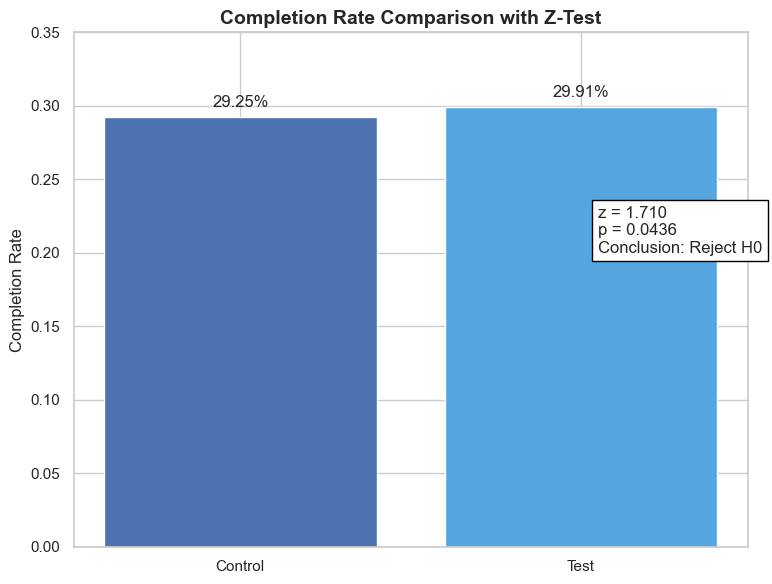

In [64]:
#barchart
p_control = 0.2925
p_test = 0.2991


n_control = 26271
n_test = 29908


p_pool = (p_control * n_control + p_test * n_test) / (n_control + n_test)


se = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_test))


z_stat = (p_test - p_control) / se
p_value = 1 - norm.cdf(z_stat)


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

groups = ['Control', 'Test']
rates = [p_control, p_test]
colors = ['#4c72b0', '#55a6e0']

bars = plt.bar(groups, rates, color=colors)


for bar, rate in zip(bars, rates):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{rate*100:.2f}%', ha='center', va='bottom', fontsize=12)

plt.title("Completion Rate Comparison with Z-Test", fontsize=14, weight='bold')
plt.ylabel("Completion Rate", fontsize=12)
plt.ylim(0, 0.35)

annotation = (
    f"z = {z_stat:.3f}\n"
    f"p = {p_value:.4f}\n"
    f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to Reject H0'}"
)
plt.text(1.05, 0.2, annotation, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

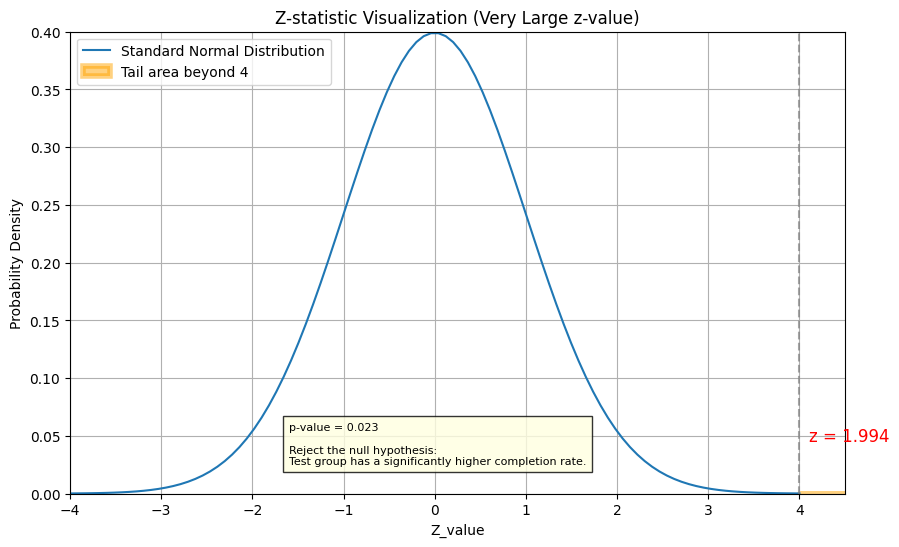

In [47]:
from scipy.stats import norm
z_stat = 1.994
p_value = 0.023
conclusion = "Reject the null hypothesis:\nTest group has a significantly higher completion rate."

# Create z values for the normal curve
z = np.linspace(-4, 4, 100)
pdf = norm.pdf(z)

plt.figure(figsize=(10, 6))

#plot the standard normal distribution curve
plt.plot(z, pdf, label='Standard Normal Distribution')

#mark z_stat=1.994
plt.axvline(4, color='gray', linestyle='--', alpha=0.7)  
plt.text(4.1, 0.05, f'z = {z_stat}', color='red', fontsize=12, verticalalignment='center')

#shade the tail area beyond 4 (indicating that your z_stat is far beyond this)
z_fill = np.linspace(4, 4.5, 500)
plt.fill_between(z_fill, norm.pdf(z_fill), color='orange', alpha=0.5, linewidth=4, label='Tail area beyond 4')

#annotate p-value and conclusion
plt.text(-1.6, 0.025, f'p-value = {p_value}\n\n{conclusion}', fontsize=8, bbox=dict(facecolor='lightyellow', alpha=0.8))

plt.title('Z-statistic Visualization (Very Large z-value)')
plt.xlabel('Z_value')
plt.ylabel('Probability Density')
plt.xlim(-4, 4.5)
plt.ylim(0, 0.4)
plt.legend()
plt.grid(True)
plt.show()

In [48]:
clean_completion_df

,Group,users_completed,total_users,clean_completion_rate
0,Control,7683,26271,29.25
1,Test,8944,29908,29.91


In [49]:
#Completion Rate with a Cost-Effectiveness Threshold 5% increase (Clean Completion Rates)
#Hypothesis Testing: z-test (two-proportions)

#Null hypothesis
#H0 = The improvement in the test group’s completion rate compared to the control group is is less than or equal to 5% (test is not cost-effective)
                   #H1: pc_test- pc_control <= 0.05 (threshold)

#Alternate hypothesis
#H1 = The improvement in the test group’s completion rate compared to the control group is greater than 5% (test is cost-effective)
                  #H0:  p_test - p_control > 0.05 (threshold)

from statsmodels.stats.proportion import proportions_ztest

control_completions = 7683
control_total = 26271
test_completions = 8944
test_total = 29908

#compute completion rates and observed difference (needed for our hypothesis)
p_control = control_completions / control_total
p_test = test_completions / test_total
obs_diff = p_test - p_control  

#compute required difference (5% relative lift over control rate)
delta_required = 0.05 * p_control  

#standard error (pooled proportion)
p_pooled = (control_completions + test_completions) / (control_total + test_total)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/control_total + 1/test_total))

#z_statistic and one-sided p-value
z_stat = (obs_diff - delta_required) / se
p_value = 1 - norm.cdf(z_stat)

#summary results
print(f"Control completion rate: {p_control:.4%}")
print(f"Test completion rate: {p_test:.4%}")
print(f"Observed difference: {obs_diff:.4%}")
print(f"Required difference for 5% lift: {delta_required:.4%}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value (one-sided): {p_value:.4f}")

#Significance level = alpha probability threshold 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Test shows cost-effective improvement (lift > 5%).")
else:
    print("Fail to reject the null hypothesis: Test does NOT show cost-effective improvement.")

Control completion rate: 29.2452%
Test completion rate: 29.9050%
Observed difference: 0.6599%
Required difference for 5% lift: 1.4623%
Z-statistic: -2.0788
P-value (one-sided): 0.9812
Fail to reject the null hypothesis: Test does NOT show cost-effective improvement.


In [50]:
#create a summary table to import in Tableau
data = {
    'Group': ['Control', 'Test'],
    'Completion Rate (0 errors)': ['29.2452%', '29.9050%'],
    'Observed Difference': ['n/a', '0.6599%'],
    'Required Difference for 5% Lift': ['n/a', '1.4623%'],
    'Z-statistic': ['n/a', -2.0788],
    'P-value (one-sided)': ['n/a', 0.9812],
    'Statistical Conclusion': ['n/a', 'Fail to reject null'],
    'Interpretation': ['n/a', 'No cost-effective improvement']}

df = pd.DataFrame(data)
df

,Group,Completion Rate (0 errors),Observed Difference,Required Difference for 5% Lift,Z-statistic,P-value (one-sided),Statistical Conclusion,Interpretation
0,Control,29.2452%,n/a,n/a,n/a,n/a,n/a,n/a
1,Test,29.9050%,0.6599%,1.4623%,-2.0788,0.9812,Fail to reject null,No cost-effective improvement


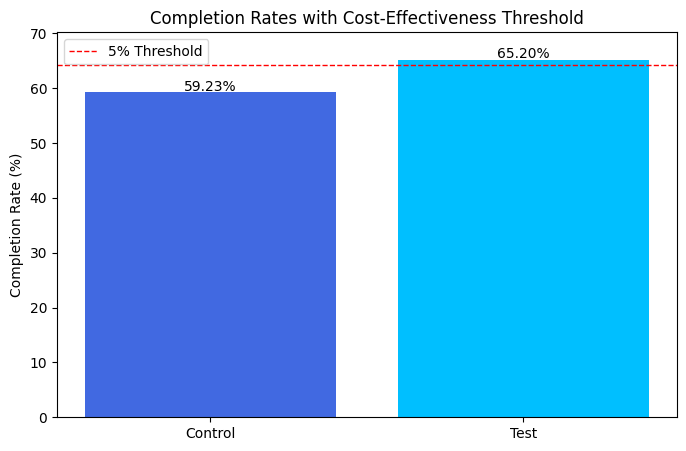

In [59]:
import matplotlib.pyplot as plt

labels = ['Control', 'Test']
rates = [p_control*100, p_test*100]
threshold = 0.05

plt.figure(figsize=(8,5))
bars = plt.bar(labels, rates, color=['royalblue', 'deepskyblue'])
plt.ylim(0, max(rates) + 5)
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rates with Cost-Effectiveness Threshold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.2f}%', ha='center')

# Plot dashed horizontal line for threshold (Control + 5%)
threshold_value = (p_control + threshold) * 100
plt.axhline(y=threshold_value, color='red', linestyle='--', linewidth=1, label='5% Threshold')

plt.legend()
plt.show()

In [52]:
flexible_completion_df

,Variation,users_completed,total_users,partial_completion_rate
0,Control,15081,26271,57.41
1,Test,18230,29908,60.95


In [53]:
#Completion Rate with a Cost-Effectiveness Threshold 5% increase (Flexible Completion Rates)
#Hypothesis Testing: z-test (two-proportions)

#Null hypothesis
#H0 = The improvement in the test group’s completion rate compared to the control group is is less than or equal to 5% (test is not cost-effective)
                   #H1: pc_test- pc_control <= 0.05 (threshold)

#Alternate hypothesis
#H1 = The improvement in the test group’s completion rate compared to the control group is greater than 5% (test is cost-effective)
                  #H0:  p_test - p_control > 0.05 (threshold)


from statsmodels.stats.proportion import proportions_ztest

flex_control_completions = 15081
flex_control_total = 26271
flex_test_completions = 18230
flex_test_total = 29908

#compute completion rates and observed difference (needed for our hypothesis)
p_control = flex_control_completions / flex_control_total
p_test = flex_test_completions / flex_test_total
obs_diff = p_test - p_control  

#compute required difference (5% relative lift over control rate)
delta_required = 0.05 * p_control  

#standard error (pooled proportion)
p_pooled = (flex_control_completions + flex_test_completions) / (flex_control_total + flex_test_total)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/flex_control_total + 1/flex_test_total))

#z_statistic and one-sided p-value
z_stat = (obs_diff - delta_required) / se
p_value = 1 - norm.cdf(z_stat)

#summary results
print(f"Control completion rate: {p_control:.4%}")
print(f"Test completion rate: {p_test:.4%}")
print(f"Observed difference: {obs_diff:.4%}")
print(f"Required difference for 5% lift: {delta_required:.4%}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value (one-sided): {p_value:.4f}")

#Significance level = alpha probability threshold 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Test shows cost-effective improvement (lift > 5%).")
else:
    print("Fail to reject the null hypothesis: Test does NOT show cost-effective improvement.")

Control completion rate: 57.4055%
Test completion rate: 60.9536%
Observed difference: 3.5481%
Required difference for 5% lift: 2.8703%
Z-statistic: 1.6316
P-value (one-sided): 0.0514
Fail to reject the null hypothesis: Test does NOT show cost-effective improvement.


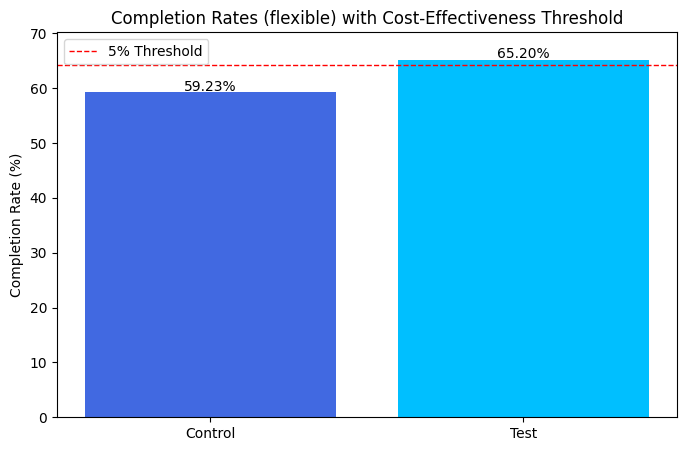

In [58]:
#Barchart
import matplotlib.pyplot as plt

labels = ['Control', 'Test']
rates = [p_control*100, p_test*100]
threshold = 0.05

plt.figure(figsize=(8,5))
bars = plt.bar(labels, rates, color=['royalblue', 'deepskyblue'])
plt.ylim(0, max(rates) + 5)
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rates (flexible) with Cost-Effectiveness Threshold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.2f}%', ha='center')

threshold_value = (p_control + threshold) * 100
plt.axhline(y=threshold_value, color='red', linestyle='--', linewidth=1, label='5% Threshold')

plt.legend()
plt.show()

In [61]:
total_flex_df

,Variation,users_reached_confirm,total_users,confirm_rate
0,Control,15560,26271,59.23
1,Test,19499,29908,65.20


In [62]:
#Completion Rate with a Cost-Effectiveness Threshold 5% increase (Flexible Completion Rates)
#Hypothesis Testing: z-test (two-proportions)

#Null hypothesis
#H0 = The improvement in the test group’s completion rate compared to the control group is is less than or equal to 5% (test is not cost-effective)
                   #H1: pc_test- pc_control <= 0.05 (threshold)
#Alternate hypothesis
#H1 = The improvement in the test group’s completion rate compared to the control group is greater than 5% (test is cost-effective)
                  #H0:  p_test - p_control > 0.05 (threshold)


total_flex_control_completions = 15560
total_flex_control_total = 26271
total_flex_test_completions = 19499
total_flex_test_total = 29908

#compute completion rates and observed difference
p_control = total_flex_control_completions / total_flex_control_total
p_test = total_flex_test_completions / total_flex_test_total
obs_diff = p_test - p_control

#compute required difference (5% relative lift over control rate)
delta_required = 0.05 * p_control  

#standard error (pooled proportion)
p_pooled = (total_flex_control_completions + total_flex_test_completions) / (total_flex_control_total + total_flex_test_total)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/total_flex_control_total + 1/total_flex_test_total))

#z_statistic and one-sided p-value
z_stat = (obs_diff - delta_required) / se
p_value = 1 - norm.cdf(z_stat)

#summary results
print(f"Control completion rate: {p_control:.4%}")
print(f"Test completion rate: {p_test:.4%}")
print(f"Observed difference: {obs_diff:.4%}")
print(f"Required difference for 5% lift: {delta_required:.4%}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value (one-sided): {p_value:.13f}")

#Significance level = alpha probability threshold 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Test shows cost-effective improvement (lift > 5%).")
else:
    print("Fail to reject the null hypothesis: Test does NOT show cost-effective improvement.")

Control completion rate: 59.2288%
Test completion rate: 65.1966%
Observed difference: 5.9678%
Required difference for 5% lift: 2.9614%
Z-statistic: 7.3403
P-value (one-sided): 0.0000000000001
Reject the null hypothesis: Test shows cost-effective improvement (lift > 5%).


In [37]:
#create a summary table to import in Tableau
data = {
    'Group': ['Control', 'Test'],
    'Completion Rate (Confirmed)': ['59.2288%', '65.1966%'],
    'Observed Difference': ['n/a', '5.9678%'],
    'Required Difference for 5% Lift': ['n/a', '2.9614%'],
    'Z-statistic': ['n/a', 7.3403],
    'P-value (one-sided)': ['n/a', 0.0000],
    'Statistical Conclusion': ['n/a', 'Reject the null hypothesis'],
    'Interpretation': ['n/a', 'Test shows cost-effective improvement (lift > 5%).']}

df_confirmed = pd.DataFrame(data)
df_confirmed

,Group,Completion Rate (Confirmed),Observed Difference,Required Difference for 5% Lift,Z-statistic,P-value (one-sided),Statistical Conclusion,Interpretation
0,Control,59.2288%,n/a,n/a,n/a,n/a,n/a,n/a
1,Test,65.1966%,5.9678%,2.9614%,7.3403,0.0,Reject the null hypothesis,Test shows cost-effective improvement (lift > ...


In [38]:
df['Scenario'] = '0 errors'
df_confirmed['Scenario'] = 'Confirm'

combined_df = pd.concat([df, df_confirmed], ignore_index=True)

cols = ['Scenario'] + [col for col in combined_df.columns if col != 'Scenario']
combined_df = combined_df[cols]
combined_df

,Scenario,Group,Completion Rate (0 errors),Observed Difference,Required Difference for 5% Lift,Z-statistic,P-value (one-sided),Statistical Conclusion,Interpretation,Completion Rate (Confirmed)
0,0 errors,Control,29.2452%,n/a,n/a,n/a,n/a,n/a,n/a,NaN
1,0 errors,Test,29.9050%,0.6599%,1.4623%,-2.0788,0.9812,Fail to reject null,No cost-effective improvement,NaN
2,Confirm,Control,NaN,n/a,n/a,n/a,n/a,n/a,n/a,59.2288%
3,Confirm,Test,NaN,5.9678%,2.9614%,7.3403,0.0,Reject the null hypothesis,Test shows cost-effective improvement (lift > ...,65.1966%


In [39]:
cols = list(combined_df.columns)

cols.remove('Completion Rate (Confirmed)')

idx = cols.index('Completion Rate (0 errors)')

cols.insert(idx + 1, 'Completion Rate (Confirmed)')

combined_df = combined_df[cols]
combined_df

,Scenario,Group,Completion Rate (0 errors),Completion Rate (Confirmed),Observed Difference,Required Difference for 5% Lift,Z-statistic,P-value (one-sided),Statistical Conclusion,Interpretation
0,0 errors,Control,29.2452%,NaN,n/a,n/a,n/a,n/a,n/a,n/a
1,0 errors,Test,29.9050%,NaN,0.6599%,1.4623%,-2.0788,0.9812,Fail to reject null,No cost-effective improvement
2,Confirm,Control,NaN,59.2288%,n/a,n/a,n/a,n/a,n/a,n/a
3,Confirm,Test,NaN,65.1966%,5.9678%,2.9614%,7.3403,0.0,Reject the null hypothesis,Test shows cost-effective improvement (lift > ...


In [40]:
combined_df.to_csv('combined_ab_test_results.csv', index=False)

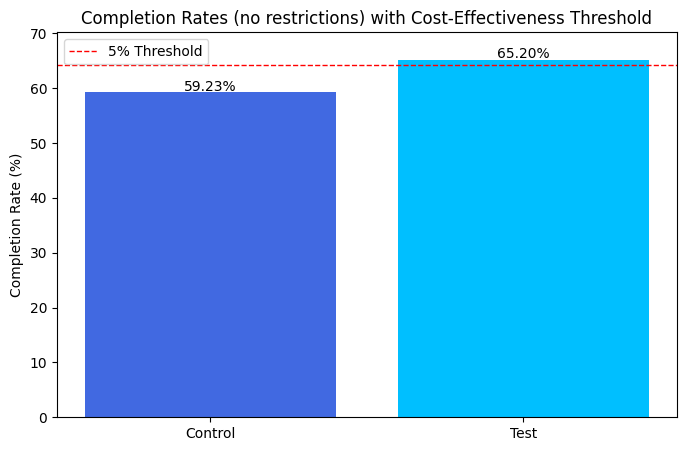

In [60]:
import matplotlib.pyplot as plt

labels = ['Control', 'Test']
rates = [p_control*100, p_test*100]
threshold = 0.05

plt.figure(figsize=(8,5))
bars = plt.bar(labels, rates, color=['royalblue', 'deepskyblue'])
plt.ylim(0, max(rates) + 5)
plt.ylabel('Completion Rate (%)')
plt.title('Completion Rates (no restrictions) with Cost-Effectiveness Threshold')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{height:.2f}%', ha='center')

threshold_value = (p_control + threshold) * 100
plt.axhline(y=threshold_value, color='red', linestyle='--', linewidth=1, label='5% Threshold')

plt.legend()
plt.show()